In [16]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Класс для представления графа 
class Graph: 

    def __init__(self, vertices): 
        self.V = vertices  # Количество вершин 
        self.graph = []  # Список для хранения графа 

    # Функция для добавления ребра в граф 
    def addEdge(self, u, v, w): 
        self.graph.append([u, v, w]) 
        
    # Вспомогательная функция для печати решения 
    def _printArr(self, dist): 
        print("Вершина \t Расстояние от источника") 
        for i in range(self.V): 
            print("% d \t\t % d" % (i, dist[i])) 
    
    # Основная функция, которая находит кратчайшие расстояния от src до 
    # всех остальных вершин с использованием алгоритма Беллмана-Форда. 
    # Функция также обнаруживает цикл с отрицательным весом 
    def BellmanFord(self, src): 

        # Шаг 1: Инициализируем расстояния от src до всех остальных вершин 
        # как БЕСКОНЕЧНОСТЬ 
        dist = [float("Inf")] * self.V 
        dist[src] = 0

        # Шаг 2:
        # путь от src до любой другой вершины может иметь максимум |V| - 1 
        # ребер 
        for i in range(self.V - 1): 
            for u, v, w in self.graph: 
                if dist[u] != float("Inf") and dist[u] + w < dist[v]: 
                    dist[v] = dist[u] + w 

        # Шаг 3: 
        # Проверяем наличие циклов с отрицательным весом. 
        # Если мы получаем более короткий путь, значит, есть цикл. 
        for u, v, w in self.graph: 
            if dist[u] != float("Inf") and dist[u] + w < dist[v]: 
                print("Граф содержит цикл с отрицательным весом")
                return
                        
        # Печатаем все расстояния 
        self._printArr(dist) 

    # Функция для рисования графа 
    def drawGraph(self):
        G = nx.DiGraph()  # Создаем ориентированный граф

        # Добавляем ребра в граф
        for u, v, w in self.graph:
            G.add_edge(u, v, weight=w)

        # Определяем расположение вершин по кругу
        angles = np.linspace(0, 2 * np.pi, self.V, endpoint=False)  # Углы для вершин
        pos = {i: (np.cos(angle), np.sin(angle)) for i, angle in enumerate(angles)}  # Координаты вершин

        nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
        
        # Рисуем веса рёбер
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        
        plt.title("Граф")
        plt.axis('equal')  # Устанавливаем равные масштабы по осям
        plt.show()

In [22]:

g = Graph(5) 
g.addEdge(0, 1, -1) 
g.addEdge(0, 2, 4) 
g.addEdge(1, 2, 3) 
g.addEdge(1, 3, 2) 
g.addEdge(1, 4, 2) 
g.addEdge(3, 2, 5) 
g.addEdge(3, 1, 1) 
g.addEdge(4, 3, -3) 

# Print the solution 
g.BellmanFord(0) 

Вершина 	 Расстояние от источника
 0 		  0


OverflowError: cannot convert float infinity to integer

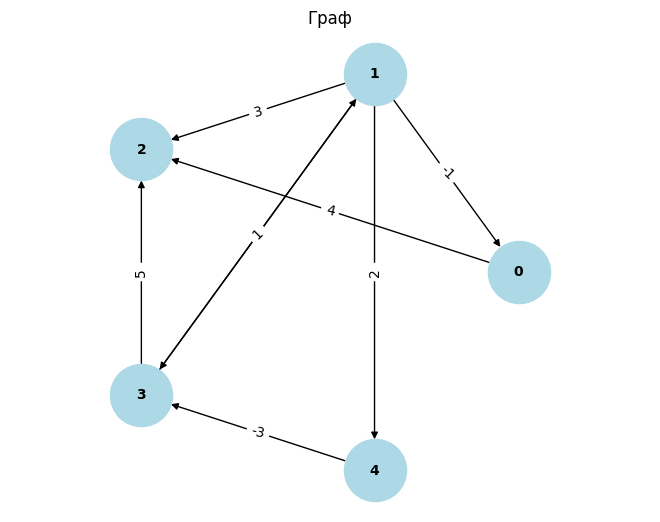

In [25]:
g.drawGraph()